# Task2: Prediction Using Un Supervised ML

##### In this task we are going to predict the optimum number of clusters from the given dataset and represent it visually.This includes unsupervised learning 

# Importing Libraries 

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [45]:
data=pd.read_csv('Iris.csv')

In [46]:
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [47]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [49]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [50]:
print(data.Species.nunique())

3


In [52]:
print(data.Species.value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


# Data Visualization 

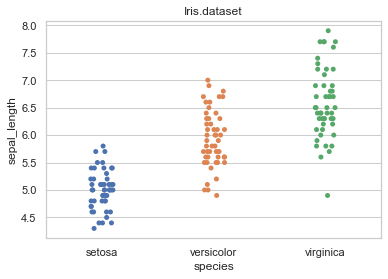

In [53]:
sns.set(style='whitegrid')
Iris=sns.load_dataset('iris');
ax=sns.stripplot(x='species',y='sepal_length',data=Iris);
plt.title('Iris.dataset')
plt.show()

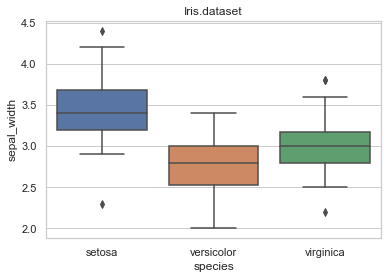

In [54]:
sns.boxplot(x='species',y='sepal_width',data=Iris)
plt.title('Iris.dataset')
plt.show()

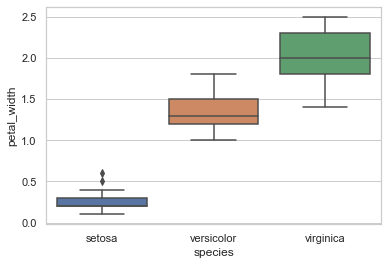

In [55]:
sns.boxplot(x='species',y='petal_width',data=Iris)
plt.show()

# Count Plot

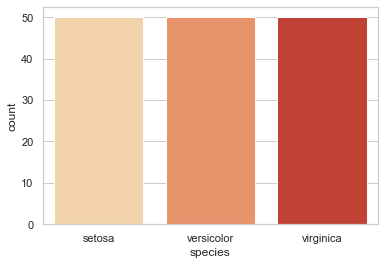

In [56]:
sns.countplot(x='species',data=Iris,palette='OrRd')
plt.show()

# Heat Map

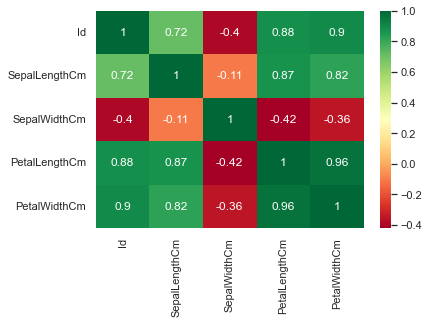

In [57]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

<AxesSubplot:>

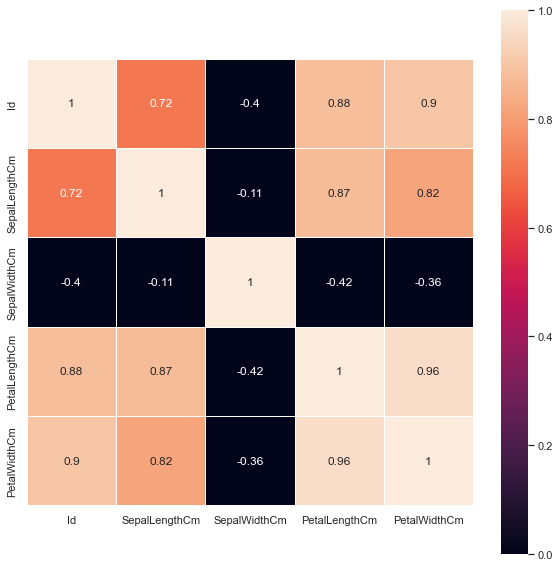

In [58]:
Iris1=data.corr()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(Iris1,vmin=0,square=True,annot=True,linewidths=1)

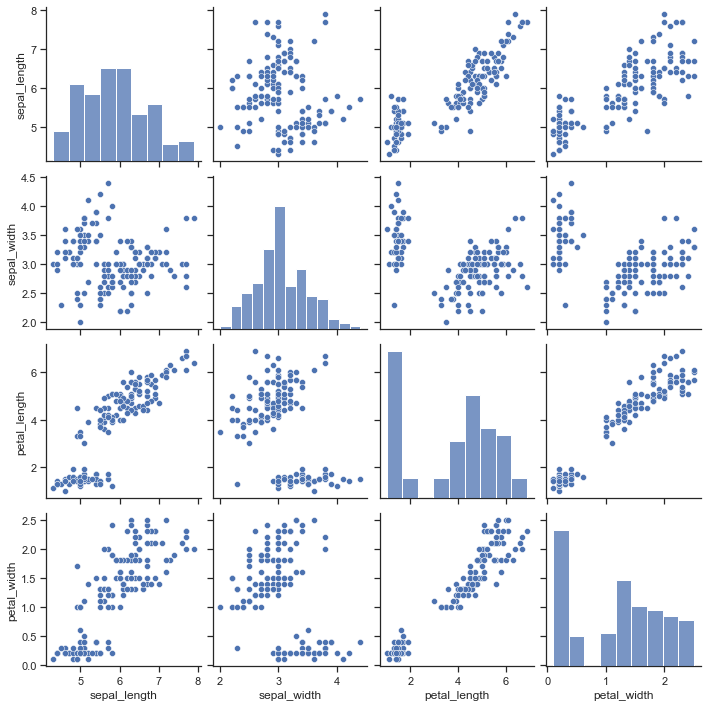

In [59]:
sns.set(style='ticks',color_codes=True)
Iris=sns.load_dataset('Iris')
g=sns.pairplot(Iris)
plt.show()

# Finding the optimum number of clusters using k-means clustering

In [61]:
x=data.iloc[:,[0,1,2,3]].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('k:',i,'wcss:',kmeans.inertia_)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


k: 1 wcss: 281831.54466666665
k: 2 wcss: 70581.3808
k: 3 wcss: 31320.711199999998
k: 4 wcss: 17758.792503556186
k: 5 wcss: 11468.968747023808
k: 6 wcss: 7921.863473076924
k: 7 wcss: 5911.632365518541
k: 8 wcss: 4541.979023391813
k: 9 wcss: 3571.911095588235
k: 10 wcss: 2943.933100840336


### Plotting the result onto a line graph,allowing us to observe 'The Elbow'

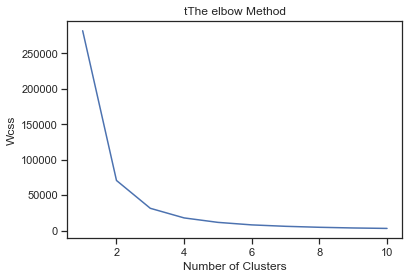

In [62]:
plt.plot(range(1,11),wcss)
plt.title("tThe elbow Method")
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

### Initializing K-Means with optimum number of clusters

In [63]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [64]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Visualizing the clusters

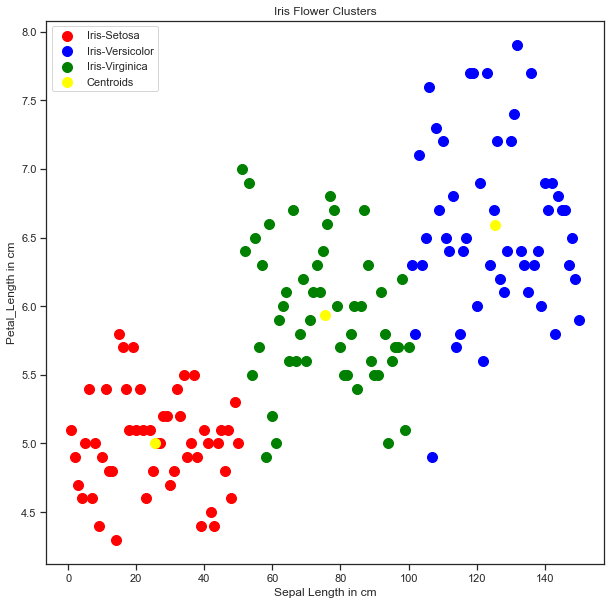

In [65]:
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='red',label='Iris-Setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='blue',label='Iris-Versicolor')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='green',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal_Length in cm')
plt.legend()
plt.show()